# Optimal Bayes Classifier - Excercise Notebook


### Comparing Optimal Bayes and Naive Bayes using simulated Gaussian data for non-zero covariance.

Authored by: Avani Gupta <br>
Roll: 2019121004

#### Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

#### Data Generation

In [2]:
#data of Gaussian Distributions
#distribution 1
# mu1 = [2, 2]
# sigma1 = [[5, 0], [0, 5]] # Notice the 0 covariance
# x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T

# #distribution 2
# mu2 = [-2, -2]
# sigma2 = [[3, 0], [0, 3]] # Notice the 0 covariance
# x2, y2 = np.random.multivariate_normal(mu2, sigma2, 100).T

np.random.seed(seed = 3)
#distribution1
mu1 = [2, 2]
sigma1 = [[5, -4], [-4, 5]]
x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T
#distribution2
mu2 = [-2, -2]
sigma2 = [[3.5, 3], [3, 3.5]]
x2, y2 = np.random.multivariate_normal(mu2, sigma2, 100).T
mu_lst = [mu1,mu2]
sigma_lst = [sigma1,sigma2]

#### Excercise: A) Plot the decision boundary

Text(0.5, 1.0, 'Optimal  Bayes(blue) vs Naive  Bayes(red)')

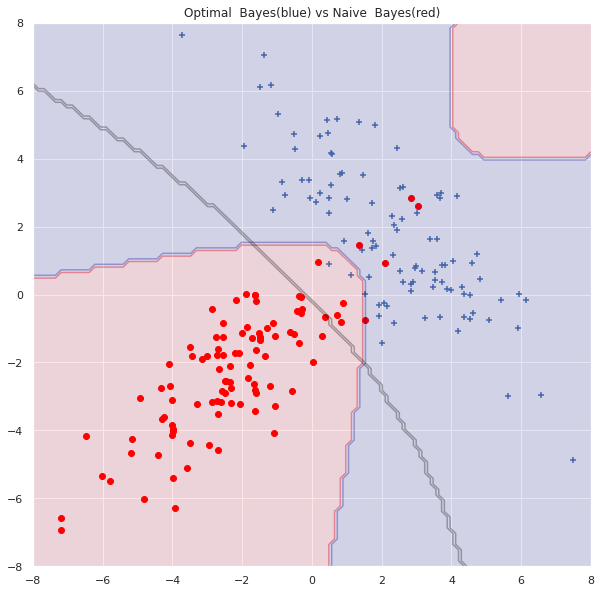

In [3]:
#%%%%%%%%%%%%%% Excercise: Write the code below %%%%%%%%%%%%%%%%%%%%%%%%%
"""
Code for comparing the decision boundary for the optimal and the naive Bayes classifiers goes here
"""
def optimalBayes(X,Y,mu_list,sigma_list):
    res = []
    for xx, yy in zip(np.ravel(X), np.ravel(Y)):
        pred = optimalBayesPred(np.array([xx,yy]),mu_list,sigma_list) 
        res.append(pred)
    res = np.array(res)
    res = res.reshape(X.shape)
    return res

def optimalBayesPred(X,mu_list,sigma_list): 
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

def naiveBayes(X_d,y_d,X,Y):
    nb = GaussianNB(priors = None)
    nb.fit(X_d,y_d)
    pred = np.array(  [nb.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
    return pred,nb


X = np.linspace(-8, 8, 100)
Y = np.linspace(-8, 8, 100)
X, Y = np.meshgrid(X, Y)

fig = plt.figure(figsize = (10,10))
plt.scatter(x1,y1, marker='+')
plt.scatter(x2,y2, c= 'red', marker='o')

#Optimal Bayes classifier
res = optimalBayes(X,Y,mu_lst,sigma_lst)
plt.contour( X, Y, res, 1, alpha = .3, colors = ('darkblue','red'))
plt.contourf( X, Y, res, 1, alpha = .1, colors = ('darkblue','red'))

#Naive Bayes classifier
X_d = np.asarray(np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T)
y_d = np.hstack((np.zeros(100),np.ones(100)))
pred,nb =  naiveBayes(X_d,y_d,X,Y)
predNB = pred.reshape(X.shape)
plt.contour( X, Y, predNB, 1, alpha = .3, colors = ('black'))
plt.title('Optimal  Bayes(blue) vs Naive  Bayes(red)')



#### Excercise: B) Accuracies

In [4]:
#%%%%%%%%%%%%%% EXCERCISE - Write the code below %%%%%%%%%%%%%%%%%%%%%%%%%%%
"""
Code for comparing the accuracies of the optimal and the naive Bayes classifiers goes here
"""
X_data = np.asarray(np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T)
y_labels = np.hstack((np.zeros(100),np.ones(100)))
#Optimal Bayes accuracy
y_pred = optimalBayes(X_data[:,0],X_data[:,1],mu_lst,sigma_lst)
yacc = np.mean(y_pred == y_labels)
print("Optimal Bayes accuracy",yacc)

#Naive Bayes accuracy
ybnacc= nb.score(X_data,y_labels)
print("Naive Bayes accuracy",ybnacc)

Optimal Bayes accuracy 0.965
Naive Bayes accuracy 0.95
